<a href="https://colab.research.google.com/github/alirezash97/Cardio/blob/master/HeartBeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle
!mkdir .kaggle
import json
token = {"username":"alirezashafaei97","key":"9cb262aa0c5658ffc4eb45857c41903c"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d shayanfazeli/heartbeat -p /content
!unzip /content/heartbeat.zip -d /content/heartbeat

In [1]:
import pandas as pd
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model, Sequential, Model
from tensorflow.keras.layers import (Input, Dense, LeakyReLU, Softmax, InputLayer, concatenate, Conv1D, MaxPool1D, Add, MaxPooling1D
 , Flatten, Dropout, ReLU, BatchNormalization, GlobalAveragePooling1D)
from keras.utils.np_utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from random import uniform 
import random


from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix


Using TensorFlow backend.


In [0]:
train_df=pd.read_csv('/content/heartbeat/mitbih_train.csv',header=None)
test_df=pd.read_csv('/content/heartbeat/mitbih_test.csv',header=None)

In [3]:
train_df[187]=train_df[187].astype(int)
counter=train_df[187].value_counts()
print(counter)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


In [0]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=10000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=10000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=10000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=10000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=10000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [0]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [6]:
equilibre=train_df[187].value_counts()
print(equilibre)

4    10000
3    10000
2    10000
1    10000
0    10000
Name: 187, dtype: int64


In [7]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))
c

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
24456,1.000000,0.867470,0.510040,0.056225,0.000000,0.156627,0.168675,0.144578,0.108434,0.100402,0.108434,0.132530,0.112450,0.128514,0.120482,0.140562,0.120482,0.144578,0.132530,0.160643,0.140562,0.152610,0.172691,0.200803,0.200803,0.232932,0.240964,0.248996,0.257028,0.281125,0.273092,0.317269,0.317269,0.341365,0.313253,0.325301,0.289157,0.313253,0.277108,0.281125,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74551,0.995516,0.977578,0.322870,0.000000,0.089686,0.165919,0.147982,0.201794,0.264574,0.210762,0.183857,0.224215,0.345291,0.417040,0.385650,0.372197,0.390135,0.390135,0.390135,0.385650,0.408072,0.421525,0.403587,0.408072,0.426009,0.452915,0.439462,0.448430,0.506726,0.538117,0.542601,0.560538,0.614350,0.659193,0.645740,0.645740,0.636771,0.627803,0.560538,0.520179,...,0.403587,0.426009,0.394619,0.394619,0.41704,0.426009,0.412556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
75403,1.000000,0.941176,0.788770,0.612299,0.433155,0.294118,0.280749,0.334225,0.358289,0.312834,0.200535,0.098930,0.056150,0.021390,0.010695,0.000000,0.002674,0.000000,0.010695,0.016043,0.018717,0.037433,0.048128,0.061497,0.069519,0.085561,0.101604,0.117647,0.141711,0.152406,0.179144,0.195187,0.224599,0.219251,0.237968,0.240642,0.235294,0.240642,0.232620,0.221925,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80641,1.000000,0.987952,0.566265,0.305221,0.198795,0.220884,0.182731,0.196787,0.182731,0.190763,0.176707,0.186747,0.178715,0.196787,0.190763,0.202811,0.192771,0.204819,0.206827,0.216867,0.224900,0.234940,0.230924,0.257028,0.269076,0.293173,0.299197,0.321285,0.315261,0.327309,0.307229,0.295181,0.257028,0.242972,0.212851,0.218875,0.202811,0.204819,0.190763,0.194779,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
86910,0.681750,0.579186,0.457014,0.321267,0.174962,0.085973,0.012066,0.000000,0.018100,0.072398,0.188537,0.304676,0.333333,0.398190,0.452489,0.521870,0.564103,0.601810,0.619910,0.633484,0.630468,0.642534,0.647059,0.660634,0.659125,0.672700,0.683258,0.701357,0.723982,0.746606,0.760181,0.779789,0.794872,0.822021,0.846154,0.871795,0.883861,0.901961,0.904977,0.901961,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [0]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)

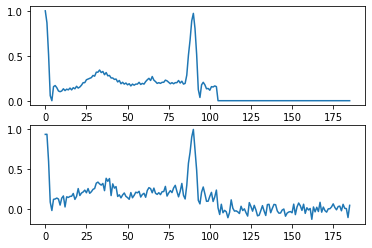

In [9]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [0]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [0]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
# X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
# X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [12]:
print(X_train.shape)
print(X_test.shape)

(50000, 186)
(21892, 186)


In [0]:
# periodic signal extend 

import pywt

XF_train = np.zeros((X_train.shape[0], 9000))
XF_test = np.zeros((X_test.shape[0], 9000))


for index, row in enumerate(X_train):
  XF_train[index, :] = pywt.pad(row, 4407, 'periodic')


for index, row in enumerate(X_test):
  XF_test[index, :] = pywt.pad(row, 4407, 'periodic')

In [0]:
# trainset = train_df.values
# testset = test_df.values

In [0]:
# def split(dataset, number_of_sample_per_category):
  
#   new_dataset = np.zeros((np.sum(number_of_sample_per_category), dataset.shape[1]))
#   pointer = 0
  
#   for row in dataset :
    
#     row_label = int(row[-1])
    
#     if number_of_sample_per_category[row_label] > 0 :
      
#       number_of_sample_per_category[row_label] -= 1
#       new_dataset[pointer , :] = row
#       pointer += 1

#     else:

#       pass
    
  
#   return new_dataset




In [0]:
# temp_trainset = split(trainset, [5500, 2223, 5500, 641, 5500])
# temp_testset = split(testset, [500, 500, 500, 500, 500])

In [0]:
# augmented = 0
# def data_augmentation(dataset, chance):
  
#   augmented = 0
#   number_of_rows = int(dataset.shape[0] + (dataset.shape[0] * (chance*2)))
#   new_dataset = np.zeros((number_of_rows, dataset.shape[1]))
#   pointer = 0 

#   for row in dataset:
    
#     rand_num = random.uniform(0, 1)
#     if rand_num < chance:
      
#       augmented += 1
#       noise = np.random.normal(scale=0.01, size=187)
#       new_signal = np.zeros((1, 188))
#       new_signal[:, :187] = row[:187] + noise
#       new_signal[:, -1:] = row[-1:] 
#       new_dataset[pointer:pointer+1, :] = new_signal
#       pointer += 1

#     else :
#       pass

#     new_dataset[pointer, :] = row 
#     pointer += 1

#   return augmented, new_dataset  

  

In [0]:
# augmented, trainset = data_augmentation(temp_trainset, 0.08)

In [0]:
# filled = augmented + temp_trainset.shape[0]
# trainset = trainset[:filled , :]

In [0]:
# trainset = np.take(trainset,np.random.permutation(trainset.shape[0]),axis=0,out=trainset)
# testset = np.take(temp_testset,np.random.permutation(temp_testset.shape[0]),axis=0,out=temp_testset)

In [0]:
# X_temp_train = trainset[:, :-1]
# Y_train = trainset[:, -1:]
# X_temp_test = testset[:, :-1]
# Y_test = testset[:, -1:]

In [0]:
# print("X_train : ", XF_train.shape)
# print("Y_train : ", y_train.shape)
# print("X_test : ", XF_test.shape)
# print("Y_test : ", y_test.shape)

In [0]:

# One Hot enoding for target labels 
# ohe = OneHotEncoder()
# Y_train = ohe.fit_transform(Y_train.reshape(-1,1))
# Y_test = ohe.transform(Y_test.reshape(-1,1))

# # handle sparse matrix for keras 
# Y_train = csr_matrix.toarray(Y_train)
# Y_test = csr_matrix.toarray(Y_test)

In [0]:
# print("X_train : ", X_temp_train.shape)
# print("Y_train : ", Y_train.shape)
# print("X_test : ", X_temp_test.shape)
# print("Y_test : ", Y_test.shape)

In [0]:
# periodic signal extend 

# import pywt

# XF_train = np.zeros((X_temp_train.shape[0], 9000))
# XF_test = np.zeros((X_temp_test.shape[0], 9000))


# for index, row in enumerate(X_temp_train):
#   XF_train[index, :-1] = pywt.pad(row, 4406, 'symmetric')
#   XF_train[index, -1:] = 0


# for index, row in enumerate(X_temp_test):
#   XF_test[index, :-1] = pywt.pad(row, 4406, 'symmetric')
#   XF_test[index, -1:] = 0
 



In [0]:
# for index, row in enumerate(X_temp_train):
#   X_temp_train[index] = add_gaussian_noise(row)
# for index, row in enumerate(X_temp_test):
#   X_temp_test[index] = add_gaussian_noise(row)


In [0]:
XF_train = XF_train.reshape((50000, 9000, 1))
XF_test = XF_test.reshape((21892, 9000, 1))

In [15]:
print("X_train : ", XF_train.shape)
print("Y_train : ", y_train.shape)
print("X_test : ", XF_test.shape)
print("Y_test : ", y_test.shape)

X_train :  (50000, 9000, 1)
Y_train :  (50000, 5)
X_test :  (21892, 9000, 1)
Y_test :  (21892, 5)


In [16]:
X_input = Input(shape=(9000, 1))
Conv = Conv1D(filters=16, kernel_size=5, strides=2)(X_input)


### step 1 

Conv1_1 = Conv1D(filters=32, kernel_size=9, strides=1, padding='same')(Conv)
Bn1_1 = BatchNormalization()(Conv1_1)
Act1_1 = LeakyReLU()(Bn1_1)
Conv1_2 = Conv1D(filters=32, kernel_size=7, strides=1, padding='same')(Act1_1)
Bn1_2 = BatchNormalization()(Conv1_2)
Act1_2 = LeakyReLU()(Bn1_2)
DO1_1 = Dropout(0.2)(Act1_2)
Conv1_3 = Conv1D(filters=16, kernel_size=9, strides=1, padding='same')(DO1_1)
Bn1_3 = BatchNormalization()(Conv1_3)
shortcut1_1 = Add()([Bn1_3, Conv])
Bn1_4 = BatchNormalization()(shortcut1_1)
Act1_3 = LeakyReLU()(Bn1_4)
##### auxiliary
Conv1_4 = Conv1D(filters=32, kernel_size=7, strides=1, padding='same')(Act1_3)
Bn1_4 = BatchNormalization()(Conv1_4)
Act1_4 = LeakyReLU()(Bn1_4)
###############
Max1_1 = MaxPooling1D(pool_size=5, strides=2)(Act1_4)


## step 2

Conv2_1 = Conv1D(filters=16, kernel_size=3, strides=1, padding='same')(Max1_1)
Bn2_1 = BatchNormalization()(Conv2_1)
Act2_1 = LeakyReLU()(Bn2_1)
Conv2_2 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(Act2_1)
Bn2_2 = BatchNormalization()(Conv2_2)
Act2_2 = LeakyReLU()(Bn2_2)
DO2_1 = Dropout(0.2)(Act2_2)
Conv2_3 = Conv1D(filters=32, kernel_size=3, strides=1, padding='same')(DO2_1)
Bn2_3 = BatchNormalization()(Conv2_3)
shortcut2_1 = Add()([Bn2_3, Max1_1])
Bn2_4 = BatchNormalization()(shortcut2_1)
Act2_3 = LeakyReLU()(Bn2_4)
##### auxiliary
Conv2_4 = Conv1D(filters=64, kernel_size=7, strides=1, padding='same')(Act2_3)
Bn2_4 = BatchNormalization()(Conv2_4)
Act2_4 = LeakyReLU()(Bn2_4)
###############
Max2_1 = MaxPooling1D(pool_size=5, strides=3)(Act2_4)


## step 3

Conv3_1 = Conv1D(filters=32, kernel_size=16, strides=1, padding='same')(Max2_1)
Bn3_1 = BatchNormalization()(Conv3_1)
Act3_1 = LeakyReLU()(Bn3_1)
Conv3_2 = Conv1D(filters=64, kernel_size=32, strides=1, padding='same')(Act3_1)
Bn3_2 = BatchNormalization()(Conv3_2)
Act3_2 = LeakyReLU()(Bn3_2)
Conv3_3 = Conv1D(filters=64, kernel_size=16, strides=1, padding='same')(Act3_2)
Bn3_3 = BatchNormalization()(Conv3_3)
shortcut3_1 = Add()([Bn3_3, Max2_1])
Bn3_4 = BatchNormalization()(shortcut3_1)
Act3_3 = LeakyReLU()(Bn3_4)
##### auxiliary
Conv3_4 = Conv1D(filters=128, kernel_size=7, strides=1, padding='same')(Act3_3)
Bn3_4 = BatchNormalization()(Conv3_4)
Act3_4 = LeakyReLU()(Bn3_4)
###############
Max3_1 = MaxPooling1D(pool_size=5, strides=2)(Act3_4)


## step 4

Conv4_1 = Conv1D(filters=64, kernel_size=64, strides=1, padding='same')(Max3_1)
Bn4_1 = BatchNormalization()(Conv4_1)
Act4_1 = LeakyReLU()(Bn4_1)
Conv4_2 = Conv1D(filters=64, kernel_size=128, strides=1, padding='same')(Act4_1)
Bn4_2 = BatchNormalization()(Conv4_2)
Act4_2 = LeakyReLU()(Bn4_2)
DO4_1 = Dropout(0.2)(Act4_2)
Conv4_3 = Conv1D(filters=128, kernel_size=64, strides=1, padding='same')(DO4_1)
Bn4_3 = BatchNormalization()(Conv4_3)
shortcut4_1 = Add()([Bn4_3, Max3_1])
Bn4_4 = BatchNormalization()(shortcut4_1)
Act4_3 = LeakyReLU()(Bn4_4)
##### auxiliary
Conv4_4 = Conv1D(filters=256, kernel_size=7, strides=1, padding='same')(Act4_3)
Bn4_4 = BatchNormalization()(Conv4_4)
Act4_4 = LeakyReLU()(Bn4_4)
###############
Max4_1 = MaxPooling1D(pool_size=5, strides=3)(Act4_4)




Flat1 = Flatten()(Max4_1)

D1 = Dense(256)(Flat1)
A6 = LeakyReLU()(D1)
D_O = Dropout(0.15)(A6)
D2 = Dense(128)(D_O)
D3 = Dense(5)(D2)
A7 = Softmax()(D3)

model = Model(inputs=X_input, outputs=A7)

model.summary()




Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 9000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 4498, 16)     96          input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 4498, 32)     4640        conv1d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 4498, 32)     128         conv1d_1[0][0]                   
______________________________________________________________________________________________

In [0]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early Stopping
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Fit the model
model.fit(XF_train, y_train, epochs=20, batch_size=128, validation_data=(XF_test, y_test), callbacks=[es_callback])

Epoch 1/20
391/391 [==============================] - 10146s 26s/step - loss: 2.3714 - accuracy: 0.6482 - val_loss: 2.8535 - val_accuracy: 0.0328
Epoch 2/20
374/391 [===========================>..] - ETA: 6:43 - loss: 0.6098 - accuracy: 0.8023